# Imports

In [1]:
from spectralCollocationSolver import SpectralCollocationSolver

import numpy as np
import matplotlib.pyplot as plt

If the barycentricInterpolation module can not be found ("ModuleNotFoundError: No module named 'barycentricInterpolation'"), probably you just forgot to install it. The package is provided in my github repository with the same name (https://github.com/lubo92/barycentricLagrangeInterpolation/). Download or clone the repository and then run the setup.py installation utility. For details see the readme in the repository.

# Define the Function to Be Solved

To some people the following coding approach may appear a little bit strange. I'm not sure if this is a good concept or not - but it works!
In the provided python package (`spectralCollocationSolver`) a class `SepctralCollocationSolver` exists. This class contains all functionality to solve differential equations - with one exception: The traget function is not contained.
In order to define the function to be solved, follow the provided exmaple:
* First you need to create a child class of the `SpectralCollocationSolver`. In the example below it's the `HarmonicOscillator` class.
* Copy the `__init__` method from the exmaple to your function.
* Create the `residuals` function. In this function you define your differential equation to be solved. You have to return the residual of the interpolating function solving your differential equation at every node as well as the residuals for all boundary conditions.

---
**CAVEAT:**

Since we are using a barycentric Langrange Interpolation to solve the differential equation, the target function is only defined on the intervall [-1,1]. If your differential equation is defined on an other domain you have to transform your coordinates, e.g. with a tangent.

Be cautious: If you transform your coordinates, you need also transform your derivatives/ differential equations. For details see my repository on the Blasius equation, where I apply this Python package.

---

**How to define the differential equation:**
* `values` is the array containing the values of the interpolating function at all nodes
* `self.f.derivative(values,self.D1)` returns the (values of the) first derivative of the function defined by '`values`' at the nodes
* `self.f.derivative(values,self.D2)` returns the (values of the) second derivative of the function defined by '`values`' at the nodes
* `self.f.evaluateFunction(-1,values,self.weights,self.nodes)` gives you the function at the point -1

In [2]:
class HarmonicOscillator(SpectralCollocationSolver):
    def __init__(self):
        SpectralCollocationSolver.__init__(self)
        
    def residuals(self,values,args):
        """This function calculates some residuals:
        - the residuals of the harmonic oscillator equation at every node
        - the residuals of every boundary condition
        
        Parameters:
        values(ndarray[nNodes]): values of the function to calculate residuals for - given at every sampling point
        args(tuple): (omega^2,f(0),f'(0))

        Returns:
        ndarray[nNodes+2] : residuals at every node as well as residuals of the two boundary conditions
        """
        omega2 = args[0]
        boundary1 = args[1]
        boundary2 = args[2]
        
        
        #residuals at the sampling points
        residuals1 = omega2*values + self.f.derivative(values,self.D2)
        
        #residuals for boundary conditions
        residuals2 = self.f.evaluateFunction(-1,values,self.weights,self.nodes)-boundary1
        residuals3 = self.f.evaluateFunction(-1,self.f.derivative(values,self.D1),self.weights,self.nodes)-boundary2
        temp2 = np.reshape(residuals2,1)
        temp3 = np.reshape(residuals3,1)
        return np.concatenate((residuals1, temp2, temp3))

# Initialize Class

In [3]:
solver = HarmonicOscillator()

initializing spectral collocation solver class


# Set up Solver
'nNodes' is the number of nodes, at which the differential equation is solved. A low number of nodes gives very quick results and is in most cases nummerically stable, but it might not be possible approximate the target function well with only very few nodes. A high number of nodes may take longer to calculate and get's at some point nummerically unstable.

In [4]:
solver.setupUtilities(nNodes = 70)

initializing interpolating function class


/home/wolfgang/anaconda3/envs/pa/lib/python3.7/site-packages/barycentricLagrangeInterpolation-1.0.0-py3.7.egg/barycentricLagrangeInterpolation/barycentricLagrangeInterpolation.py:66: RuntimeWarning: divide by zero encountered in true_divide
  np.repeat(np.reshape(nodes,[len(nodes),1]),len(s),axis=1)),axis=0)
/home/wolfgang/anaconda3/envs/pa/lib/python3.7/site-packages/barycentricLagrangeInterpolation-1.0.0-py3.7.egg/barycentricLagrangeInterpolation/barycentricLagrangeInterpolation.py:69: RuntimeWarning: divide by zero encountered in true_divide
  temp1 = weights[j]/(s-nodes[j])
/home/wolfgang/anaconda3/envs/pa/lib/python3.7/site-packages/barycentricLagrangeInterpolation-1.0.0-py3.7.egg/barycentricLagrangeInterpolation/barycentricLagrangeInterpolation.py:70: RuntimeWarning: invalid value encountered in multiply
  l[j,:]=temp1*temp2
/home/wolfgang/anaconda3/envs/pa/lib/python3.7/site-packages/barycentricLagrangeInterpolation-1.0.0-py3.7.egg/barycentricLagrangeInterpolation/barycentricLag

# Solve Equation

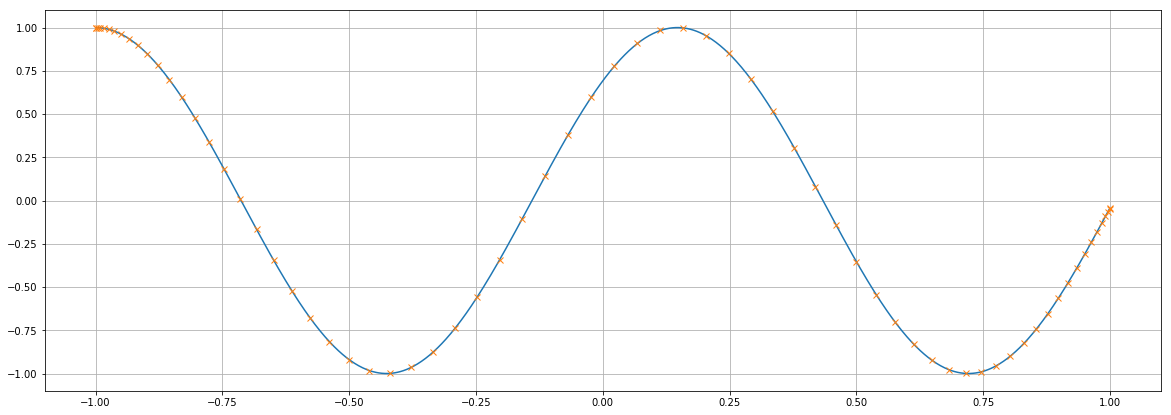

In [17]:
omegaSquare = 30
x0 = 1
v0 = 0
init = np.random.normal(size=solver.nNodes)
solution = solver.solve(init,(omegaSquare,x0,v0))

# Check Result
In order to check the result, we evalute the function at the point `t = 2*pi/omega` and subtract the initial vaule `x0=1`. We expect an result close to zero.

In [18]:
solver.f.evaluateFunction(-1+2*np.pi/np.sqrt(omegaSquare),solution.x,solver.weights,solver.nodes)-1

-7.083222897108499e-14